In [2]:
# !pip install scikit-learn

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
import pandas as pd

# load your dataset
df = pd.read_csv("/Users/user/Desktop/AIPISCIAA/data/scenario_2_dataset.csv")

# numeric columns only
num_cols = df.select_dtypes(include=['int64','float64']).columns

# pearson correlation
corr = df[num_cols].corr(method="pearson")

# check correlation
corr['stu_Educational attendance: Not attending'].sort_values(ascending=False).head(10)


/var/folders/w2/tz6jg3115qg7px9dk33v174w0000gn/T/ipykernel_1060/2213089274.py:4: DtypeWarning: Columns (7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/user/Desktop/AIPISCIAA/data/scenario_2_dataset.csv")


edu_Education (Aggregate levels): Level not stated      1.000000
stu_Educational attendance: Not attending               1.000000
edu_Education (Aggregate levels): Intermediate          0.996635
stu_Educational attendance: Total                       0.992851
edu_Education (Aggregate levels): Total                 0.992607
stu_Educational attendance: Attending                   0.969651
edu_Education (Aggregate levels): Basic                 0.948339
Year                                                    0.916446
stu_Educational attendance: Not elsewhere classified    0.155694
WPP_value                                               0.072896
Name: stu_Educational attendance: Not attending, dtype: float64

In [5]:
corr.shape

(20, 20)

In [6]:
# # get pairs with correlation > 0.8 (example threshold)
# threshold = 0.8
# high_corr = (
#     corr.where(~pd.np.tril(pd.np.ones(corr.shape)).astype(bool))  # upper triangle only
#     .stack()
#     .reset_index()
# )
# high_corr.columns = ['Feature1','Feature2','Correlation']

# high_corr = high_corr[high_corr['Correlation'].abs() > threshold].sort_values(
#     by="Correlation", ascending=False
# )
# print(high_corr)


In [7]:
corr.columns

Index(['Unnamed: 0', 'FID', 'uniq_id', 'lgacode', 'secondary_', 'student_ct',
       'teacher_ct', 'raster_value', 'Year',
       'edu_Education (Aggregate levels): Advanced',
       'edu_Education (Aggregate levels): Basic',
       'edu_Education (Aggregate levels): Intermediate',
       'edu_Education (Aggregate levels): Less than basic',
       'edu_Education (Aggregate levels): Level not stated',
       'edu_Education (Aggregate levels): Total',
       'stu_Educational attendance: Attending',
       'stu_Educational attendance: Not attending',
       'stu_Educational attendance: Not elsewhere classified',
       'stu_Educational attendance: Total', 'WPP_value'],
      dtype='object')

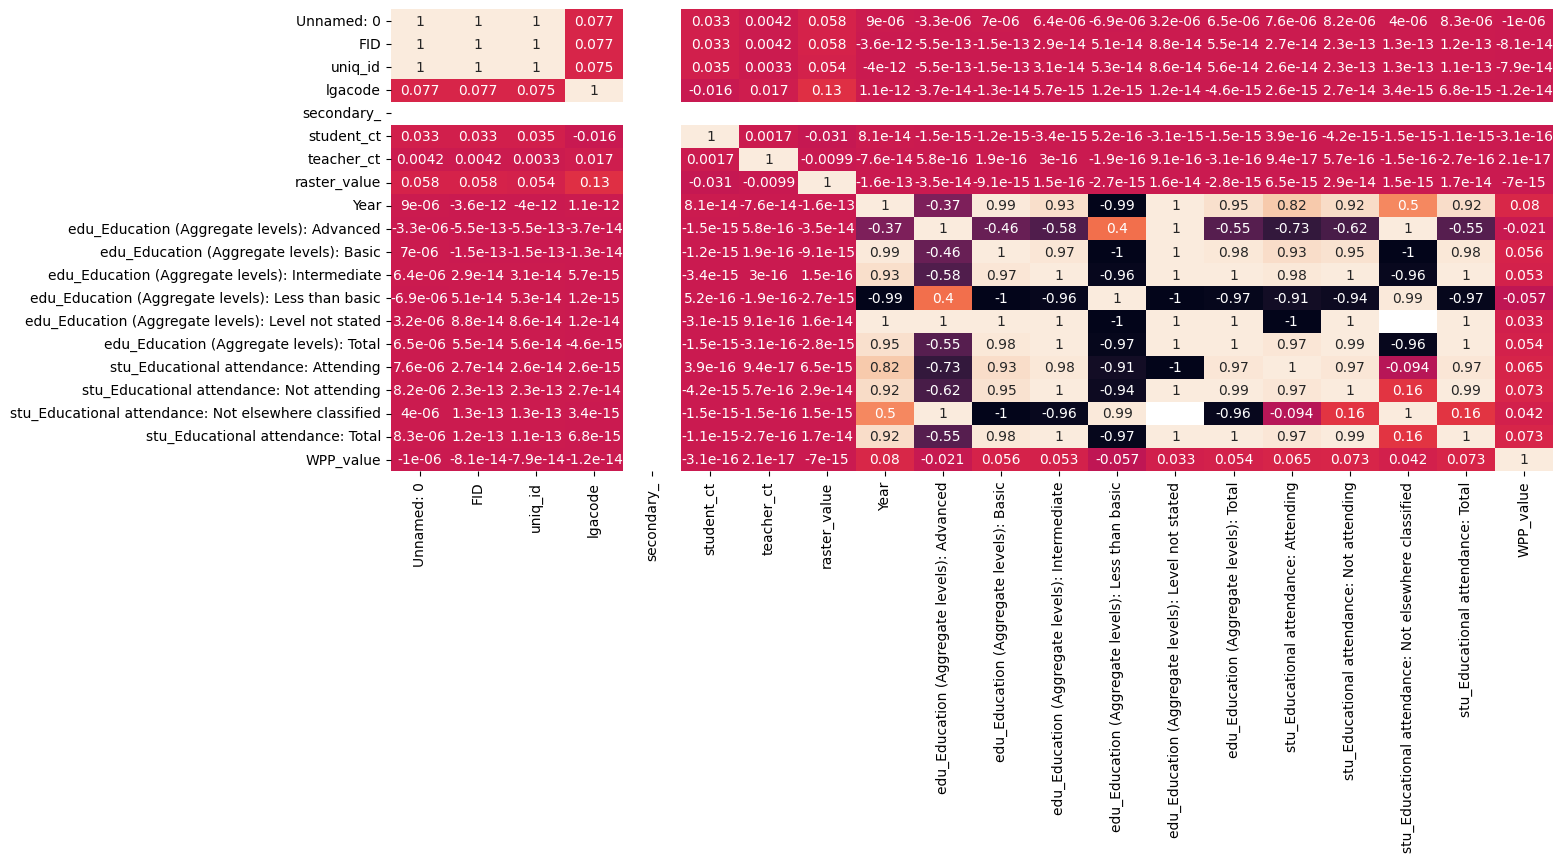

In [8]:
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, cbar=False);

After correlation analysis, we found that the edu_Total and stu_Total columns were highly correlated with their respective subcategories, so they can be dropped to avoid redundancy.

In [9]:
# Drop highly correlated columns
drop_cols = [
    'edu_Education (Aggregate levels): Total',
    'stu_Educational attendance: Total'
]

df_corr = df.drop(columns=drop_cols, errors='ignore')

In [10]:
df.columns

Index(['Unnamed: 0', 'FID', 'globalid', 'uniq_id', 'timestamp', 'editor',
       'wardname', 'wardcode', 'lganame', 'lgacode', 'statename', 'statecode',
       'secondary_', 'student_ct', 'teacher_ct', 'poi_type', 'education',
       'management', 'subtype', 'category', 'name', 'source', 'raster_value',
       'Year', 'edu_Education (Aggregate levels): Advanced',
       'edu_Education (Aggregate levels): Basic',
       'edu_Education (Aggregate levels): Intermediate',
       'edu_Education (Aggregate levels): Less than basic',
       'edu_Education (Aggregate levels): Level not stated',
       'edu_Education (Aggregate levels): Total',
       'stu_Educational attendance: Attending',
       'stu_Educational attendance: Not attending',
       'stu_Educational attendance: Not elsewhere classified',
       'stu_Educational attendance: Total', 'AdminUnit', 'AgeGroup',
       'WPP_value'],
      dtype='object')

In [11]:
df.head()

,Unnamed: 0,FID,globalid,uniq_id,timestamp,editor,wardname,wardcode,lganame,lgacode,...,edu_Education (Aggregate levels): Less than basic,edu_Education (Aggregate levels): Level not stated,edu_Education (Aggregate levels): Total,stu_Educational attendance: Attending,stu_Educational attendance: Not attending,stu_Educational attendance: Not elsewhere classified,stu_Educational attendance: Total,AdminUnit,AgeGroup,WPP_value
0,0,1,4621765a-c0db-4120-818c-94ce02e797cf,843109,2020-12-11,najib.adam,Yolde Kohi,ADSYLA11,Yola South,2021,...,NaN,NaN,NaN,862.3735,6194.09575,376.567,7433.036,Nigeria,0-4,31807.0900
1,1,1,4621765a-c0db-4120-818c-94ce02e797cf,843109,2020-12-11,najib.adam,Yolde Kohi,ADSYLA11,Yola South,2021,...,NaN,NaN,NaN,862.3735,6194.09575,376.567,7433.036,Nigeria,5-9,26566.2175
2,2,1,4621765a-c0db-4120-818c-94ce02e797cf,843109,2020-12-11,najib.adam,Yolde Kohi,ADSYLA11,Yola South,2021,...,NaN,NaN,NaN,862.3735,6194.09575,376.567,7433.036,Nigeria,10-14,22108.2960
3,3,1,4621765a-c0db-4120-818c-94ce02e797cf,843109,2020-12-11,najib.adam,Yolde Kohi,ADSYLA11,Yola South,2021,...,NaN,NaN,NaN,862.3735,6194.09575,376.567,7433.036,Nigeria,15-19,18387.5360
4,4,1,4621765a-c0db-4120-818c-94ce02e797cf,843109,2020-12-11,najib.adam,Yolde Kohi,ADSYLA11,Yola South,2021,...,NaN,NaN,NaN,862.3735,6194.09575,376.567,7433.036,Nigeria,20-24,15578.2025


Initial Preprocessing Pipeline

In [12]:
# def load_and_clean_dataset(path: str) -> pd.DataFrame:
#     """
#     Load dataset and drop highly correlated features identified.
#     """
#     # load dataset
#     df = pd.read_csv(path)

#     # drop only the redundant correlated totals
#     drop_cols = [
#         'edu_Education (Aggregate levels): Total',
#         'stu_Educational attendance: Total'
#     ]
#     df = df.drop(columns=drop_cols, errors='ignore')

#     # organize columns into groups
#     numeric_features = [
#         'secondary_', 'teacher_ct', 'student_ct', 'raster_value',
#         'Year', 'WPP_value',
#         'edu_Education (Aggregate levels): Advanced',
#         'edu_Education (Aggregate levels): Basic',
#         'edu_Education (Aggregate levels): Intermediate',
#         'edu_Education (Aggregate levels): Less than basic',
#         'edu_Education (Aggregate levels): Level not stated',
#         'stu_Educational attendance: Attending',
#         'stu_Educational attendance: Not attending',
#         'stu_Educational attendance: Not elsewhere classified'
#     ]

#     categorical_features = [
#         'wardname', 'lganame', 'statename',
#         'poi_type', 'education', 'management',
#         'subtype', 'category'
#     ]

#     # handle missing values using mean imputation
#     for col in numeric_features:
#         if df[col].isnull().sum() > 0:
#             median_value = df[col].median()
#             df[col] = df[col].fillna(median_value)

#     # Standardize numeric columns (Z-score scaling)
#     scaler = StandardScaler()
#     df[numeric_features] = scaler.fit_transform(df[numeric_features])

#     return df, numeric_features, categorical_features


In [13]:
def load_and_clean_dataset(path: str):
    """
    Load dataset, drop correlated features, handle missing values,
    and scale numeric features (including student_ct).
    """
    df = pd.read_csv(path)

    # Drop redundant correlated totals
    drop_cols = [
        'edu_Education (Aggregate levels): Total',
        'stu_Educational attendance: Total'
    ]
    df = df.drop(columns=drop_cols, errors='ignore')

    # Define numeric and categorical features
    numeric_features = [
        'secondary_', 'student_ct', 'teacher_ct', 'raster_value',
        'Year', 'WPP_value',
        'edu_Education (Aggregate levels): Advanced',
        'edu_Education (Aggregate levels): Basic',
        'edu_Education (Aggregate levels): Intermediate',
        'edu_Education (Aggregate levels): Less than basic',
        'edu_Education (Aggregate levels): Level not stated',
        'stu_Educational attendance: Attending',
        'stu_Educational attendance: Not attending',
        'stu_Educational attendance: Not elsewhere classified'
    ]

    categorical_features = [
        'wardname', 'lganame', 'statename',
        'poi_type', 'education', 'management',
        'subtype', 'category'
    ]

    # Handle missing values in numeric columns
    for col in numeric_features:
        if df[col].isnull().sum() > 0:
            df[col] = df[col].fillna(df[col].median())

    # Standardize numeric columns (Z-score)
    scaler = StandardScaler()
    df[numeric_features] = scaler.fit_transform(df[numeric_features])

    return df, numeric_features, categorical_features, scaler

In [14]:
def process_categorical(df: pd.DataFrame):
    """
    Processes categorical variables and IDs for forecasting out-of-school children.
    Keeps ID columns, encodes AgeGroup, and one-hot encodes categorical variables.
    """
    
    # Keep ID columns that would be used later to forecast
    id_cols = ["statename", "statecode", "lganame", "lgacode", 
               "wardname", "wardcode", "AdminUnit"]
    ids = df[id_cols].copy()
    
    # Encode AgeGroup 
    age_order = [
        "0-4", "5-9", "10-14", "15-19", "20-24", "25-29", "30-34", "35-39",
        "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74",
        "75-79", "80-84", "85-89", "90-94", "95-99", "100+"
    ]
    age_map = {age: i for i, age in enumerate(age_order)}
    
    df["AgeGroup"] = df["AgeGroup"].map(age_map)

    # Handling categorical missing values by filling with Unknown
    cat_cols = df.select_dtypes(include=['object']).columns
    df[cat_cols] = df[cat_cols].fillna("Unknown")

    
    # One-hot encode categorical features
    cat_features = ["poi_type", "education", "management", "subtype", "category"]
    df = pd.get_dummies(df, columns=cat_features, drop_first=True, dtype="int")
    
    # Return both IDs columns and processed categorical dataframe
    return ids, df


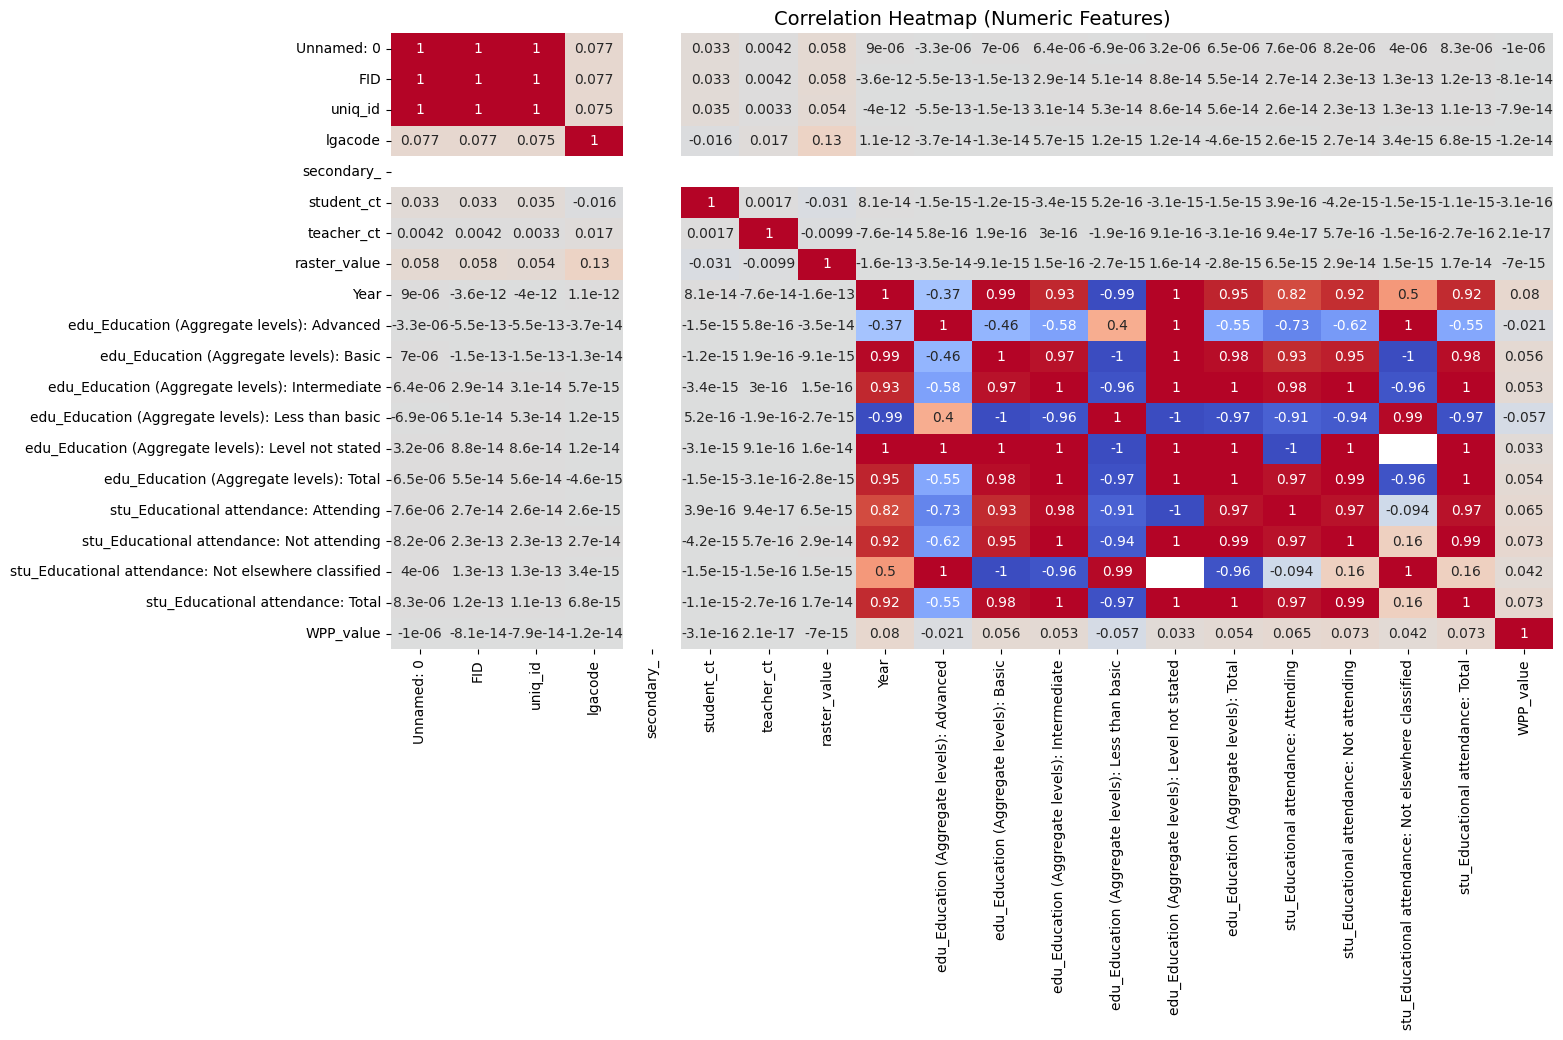

In [15]:
# Correlation heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", center=0, annot=True, cbar=False)
plt.title("Correlation Heatmap (Numeric Features)", fontsize=14)
plt.show()

In [16]:
df.columns

Index(['Unnamed: 0', 'FID', 'globalid', 'uniq_id', 'timestamp', 'editor',
       'wardname', 'wardcode', 'lganame', 'lgacode', 'statename', 'statecode',
       'secondary_', 'student_ct', 'teacher_ct', 'poi_type', 'education',
       'management', 'subtype', 'category', 'name', 'source', 'raster_value',
       'Year', 'edu_Education (Aggregate levels): Advanced',
       'edu_Education (Aggregate levels): Basic',
       'edu_Education (Aggregate levels): Intermediate',
       'edu_Education (Aggregate levels): Less than basic',
       'edu_Education (Aggregate levels): Level not stated',
       'edu_Education (Aggregate levels): Total',
       'stu_Educational attendance: Attending',
       'stu_Educational attendance: Not attending',
       'stu_Educational attendance: Not elsewhere classified',
       'stu_Educational attendance: Total', 'AdminUnit', 'AgeGroup',
       'WPP_value'],
      dtype='object')

In [17]:
def engineer_core_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Adds engineered educational pressure features.
    """
    # Student-teacher ratio (avoid div by zero)
    df["student_teacher_ratio"] = df["student_ct"] / (df["teacher_ct"].replace(0, np.nan))
    
    # Attendance proportions
    total_attendance = (
        df["stu_Educational attendance: Attending"] +
        df["stu_Educational attendance: Not attending"] +
        df["stu_Educational attendance: Not elsewhere classified"]
    )
    
    df["attendance_prop_attending"] = df["stu_Educational attendance: Attending"] / total_attendance
    df["attendance_prop_not_attending"] = df["stu_Educational attendance: Not attending"] / total_attendance
    
    return df

In [18]:
def validate_feature_consistency(df: pd.DataFrame, group_col="wardcode"):
    """
    Quick validation: checks for NaNs, infinities, and unreasonable ratios.
    """
    # Check for missing values
    print("Missing values check:\n", df.isnull().sum())
    
    # Group statistics for new features
    grouped = df.groupby(group_col)[["student_teacher_ratio",
                                     "attendance_prop_attending",
                                     "attendance_prop_not_attending"]].mean()
    print("Ward-level feature means:\n", grouped.head())
    
    return grouped

In [19]:
def create_population_lags(df: pd.DataFrame, group_col="wardcode", years=[1,2,3]):
    """
    Create lag features for population (WPP_value) and student count.
    """
    df = df.sort_values(by=[group_col, "Year"])
    for lag in years:
        df[f"WPP_value_lag{lag}"] = df.groupby(group_col)["WPP_value"].shift(lag)
        df[f"student_ct_lag{lag}"] = df.groupby(group_col)["student_ct"].shift(lag)
    return df

In [20]:
# def full_feature_pipeline(path: str):
#     df, numeric_features, categorical_features = load_and_clean_dataset(path)
#     ids, df = process_categorical(df)
#     df = engineer_core_features(df)
#     df = create_population_lags(df)
    
#     # Merge IDs back
#     df = pd.concat([ids, df], axis=1)
#     return df

In [21]:
def validate_pipeline_output(df: pd.DataFrame):
    """
    Validate engineered dataset before forecasting.
    """
    # Check collinearity
    corr = df.corr()
    high_corr = corr[(corr > 0.9) & (corr < 1.0)]
    print("Highly correlated features:\n", high_corr.dropna(how="all").dropna(axis=1, how="all"))
    
    # Redundancy: check duplicates
    duplicate_cols = df.T.duplicated().sum()
    print(f"Duplicate columns: {duplicate_cols}")
    
    # Leakage check (target shouldn't appear in predictors)
    if "stu_Educational attendance: Not attending" in df.columns:
        print("Warning: target variable still inside features!")

In [22]:
df, numeric_features, categorical_features, scaler = load_and_clean_dataset(path=r"/Users/user/Desktop/AIPISCIAA/data/scenario_2_dataset.csv")
ids, df = process_categorical(df)
df = engineer_core_features(df)
df = create_population_lags(df)
final_df = pd.concat([ids, df], axis=1)

/var/folders/w2/tz6jg3115qg7px9dk33v174w0000gn/T/ipykernel_1060/3208524061.py:6: DtypeWarning: Columns (7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/lib/_nanfunctions_impl.py:1241: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:1169: RuntimeWarning: invalid value encountered in divi

In [23]:
# final_df = full_feature_pipeline(path=r"/Users/user/Desktop/AIPISCIAA/data/scenario_2_dataset.csv")

In [24]:
final_df.shape

(11305350, 77)

In [25]:
final_df.columns

Index(['statename', 'statecode', 'lganame', 'lgacode', 'wardname', 'wardcode',
       'AdminUnit', 'Unnamed: 0', 'FID', 'globalid', 'uniq_id', 'timestamp',
       'editor', 'wardname', 'wardcode', 'lganame', 'lgacode', 'statename',
       'statecode', 'secondary_', 'student_ct', 'teacher_ct', 'name', 'source',
       'raster_value', 'Year', 'edu_Education (Aggregate levels): Advanced',
       'edu_Education (Aggregate levels): Basic',
       'edu_Education (Aggregate levels): Intermediate',
       'edu_Education (Aggregate levels): Less than basic',
       'edu_Education (Aggregate levels): Level not stated',
       'stu_Educational attendance: Attending',
       'stu_Educational attendance: Not attending',
       'stu_Educational attendance: Not elsewhere classified', 'AdminUnit',
       'AgeGroup', 'WPP_value', 'education_Informal', 'education_Integrated',
       'education_Religious', 'management_Faith Based NGO Funded',
       'management_Federal Government', 'management_NGO Funded

In [26]:
final_df.head()

,statename,statecode,lganame,lgacode,wardname,wardcode,AdminUnit,Unnamed: 0,FID,globalid,...,category_Tertiary,student_teacher_ratio,attendance_prop_attending,attendance_prop_not_attending,WPP_value_lag1,student_ct_lag1,WPP_value_lag2,student_ct_lag2,WPP_value_lag3,student_ct_lag3
0,Adamawa,AD,Yola South,2021,Yolde Kohi,ADSYLA11,Nigeria,0,1,4621765a-c0db-4120-818c-94ce02e797cf,...,0,3.387175,0.227005,0.331363,NaN,NaN,NaN,NaN,NaN,NaN
1,Adamawa,AD,Yola South,2021,Yolde Kohi,ADSYLA11,Nigeria,1,1,4621765a-c0db-4120-818c-94ce02e797cf,...,0,3.387175,0.227005,0.331363,2.115527,-0.022154,NaN,NaN,NaN,NaN
2,Adamawa,AD,Yola South,2021,Yolde Kohi,ADSYLA11,Nigeria,2,1,4621765a-c0db-4120-818c-94ce02e797cf,...,0,3.387175,0.227005,0.331363,1.609973,-0.022154,2.115527,-0.022154,NaN,NaN
3,Adamawa,AD,Yola South,2021,Yolde Kohi,ADSYLA11,Nigeria,3,1,4621765a-c0db-4120-818c-94ce02e797cf,...,0,3.387175,0.227005,0.331363,1.179944,-0.022154,1.609973,-0.022154,2.115527,-0.022154
4,Adamawa,AD,Yola South,2021,Yolde Kohi,ADSYLA11,Nigeria,4,1,4621765a-c0db-4120-818c-94ce02e797cf,...,0,3.387175,0.227005,0.331363,0.821026,-0.022154,1.179944,-0.022154,1.609973,-0.022154


In [27]:
final_df.columns

Index(['statename', 'statecode', 'lganame', 'lgacode', 'wardname', 'wardcode',
       'AdminUnit', 'Unnamed: 0', 'FID', 'globalid', 'uniq_id', 'timestamp',
       'editor', 'wardname', 'wardcode', 'lganame', 'lgacode', 'statename',
       'statecode', 'secondary_', 'student_ct', 'teacher_ct', 'name', 'source',
       'raster_value', 'Year', 'edu_Education (Aggregate levels): Advanced',
       'edu_Education (Aggregate levels): Basic',
       'edu_Education (Aggregate levels): Intermediate',
       'edu_Education (Aggregate levels): Less than basic',
       'edu_Education (Aggregate levels): Level not stated',
       'stu_Educational attendance: Attending',
       'stu_Educational attendance: Not attending',
       'stu_Educational attendance: Not elsewhere classified', 'AdminUnit',
       'AgeGroup', 'WPP_value', 'education_Informal', 'education_Integrated',
       'education_Religious', 'management_Faith Based NGO Funded',
       'management_Federal Government', 'management_NGO Funded

Using Mutual Information

In [28]:
from sklearn.feature_selection import mutual_info_regression, SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# 1. Sample data (to avoid memory issues)
sample_df = final_df.sample(100000, random_state=42)

# 2. Separate features and target
X = sample_df.drop(columns=["student_ct", "globalid", "timestamp", "uniq_id", "Unnamed: 0"], errors="ignore")
y = sample_df["student_ct"]

# 3. Drop duplicate columns
X = X.loc[:, ~X.columns.duplicated()]

# 4. Drop columns that are entirely NaN
X = X.dropna(axis=1, how="all")

# 5. Impute missing values with most frequent (works for both numeric + categorical)
imputer = SimpleImputer(strategy="most_frequent")
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns, index=X.index)

# 6. Encode categorical features
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# 7. Select top 10 features using Mutual Information
mi_selector = SelectKBest(score_func=mutual_info_regression, k=30)
X_mi = mi_selector.fit_transform(X, y)

print("Top MI features:", X.columns[mi_selector.get_support()])

Top MI features: Index(['statename', 'statecode', 'lganame', 'lgacode', 'wardname', 'wardcode',
       'FID', 'teacher_ct', 'name', 'source', 'raster_value', 'Year',
       'edu_Education (Aggregate levels): Level not stated', 'AgeGroup',
       'management_Private', 'management_Public', 'management_Public Private',
       'subtype_Aggregate', 'subtype_Junior', 'subtype_Pre Primary',
       'subtype_Primary', 'subtype_Senior', 'subtype_Standard',
       'category_Pre Primary', 'category_Secondary', 'student_teacher_ratio',
       'student_ct_lag1', 'WPP_value_lag2', 'student_ct_lag2',
       'student_ct_lag3'],
      dtype='object')


In [29]:
# %pip install mlxtend

Using Forward Selection Method

In [30]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode Categorical Features
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print(X_scaled.shape)

# X_sample = X_scaled.sample(n=500000, random_state=42)
# y_sample = y.loc[X_sample.index]

# Define model 
model = LinearRegression()

# Forward selection wrapper method
sfs_forward = SequentialFeatureSelector(
    model,
    k_features=20,        # number of features to select
    forward=True,         # forward selection
    floating=False,       # set to True for Sequential Floating Forward Selection
    scoring="r2",         # metric for regression
    cv=5                  # cross-validation folds
)

sfs_forward = sfs_forward.fit(X_scaled, y)

print("Forward Selection features:", sfs_forward.k_feature_names_)


(100000, 64)
Forward Selection features: ('statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source', 'raster_value', 'education_Integrated', 'management_Private', 'management_Public', 'management_State Government', 'management_Unknown', 'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery', 'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary', 'student_teacher_ratio', 'student_ct_lag1')


Using Backward Elimination Feature Selection Method

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode Categorical Features
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Scale numeric features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)

print(X_scaled.shape)

# X_sample = X_scaled.sample(n=500000, random_state=42)
# y_sample = y.loc[X_sample.index]

# Define model 
model = LinearRegression()

# Forward selection wrapper method
sfs_backward = SequentialFeatureSelector(
    model,
    k_features=20,        # number of features to select
    forward=False,         # Backward selection
    scoring="r2",         # metric for regression
    cv=5                  # cross-validation folds
)

sfs_backward = sfs_backward.fit(X_scaled, y)

print("Forward Selection features:", sfs_backward.k_feature_names_)

(100000, 64)
Forward Selection features: ('statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source', 'raster_value', 'education_Integrated', 'education_Religious', 'management_Public', 'management_State Government', 'management_Unknown', 'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery', 'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary', 'student_teacher_ratio', 'student_ct_lag1')


Recursive Feature Selection

In [32]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=LinearRegression(), n_features_to_select=20)
rfe = rfe.fit(X_scaled, y)
print("RFE selected features:", X.columns[rfe.support_])

RFE selected features: Index(['statename', 'statecode', 'FID', 'teacher_ct', 'source',
       'management_Private', 'management_Public', 'subtype_Aggregate',
       'subtype_Junior', 'subtype_Nursery', 'subtype_Others',
       'subtype_Pre Primary', 'subtype_Primary', 'subtype_Senior',
       'subtype_Standard', 'category_Pre Primary', 'category_Tertiary',
       'student_teacher_ratio', 'student_ct_lag1', 'student_ct_lag2'],
      dtype='object')


Linear Regression Baseline

In [33]:
# Sample & basic preprocessing (label encode)
sample = final_df.sample(n=min(500_000, len(final_df)), random_state=42)
X = sample.drop(columns=["student_ct", "globalid","timestamp","uniq_id","Unnamed: 0"], errors="ignore")
y = sample["student_ct"]

# drop duplicate/all-NaN columns etc. (as we refined earlier)
X = X.loc[:, ~X.columns.duplicated()]

# label-encode categoricals in place (for RF)
for col in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

# Fit RF and compute permutation importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
rf.fit(X, y)
perm = permutation_importance(rf, X, y, n_repeats=5, random_state=42, n_jobs=-1)

imp_df = (pd.DataFrame({
    "feature": X.columns,
    "importance": perm.importances_mean
}).sort_values("importance", ascending=False))

top_features = imp_df["feature"].head(30).tolist()  # keep top 30
X_top = X[top_features]

In [34]:
X_top.columns

Index(['student_ct_lag1', 'student_ct_lag3', 'student_teacher_ratio',
       'student_ct_lag2', 'raster_value', 'lgacode', 'name', 'teacher_ct',
       'lganame', 'wardname', 'FID', 'wardcode', 'statename', 'statecode',
       'subtype_University', 'stu_Educational attendance: Not attending',
       'stu_Educational attendance: Not elsewhere classified',
       'WPP_value_lag1', 'WPP_value_lag3',
       'stu_Educational attendance: Attending', 'attendance_prop_attending',
       'edu_Education (Aggregate levels): Advanced', 'WPP_value_lag2', 'Year',
       'edu_Education (Aggregate levels): Intermediate',
       'edu_Education (Aggregate levels): Level not stated', 'WPP_value',
       'attendance_prop_not_attending', 'subtype_Primary',
       'management_Private'],
      dtype='object')

Linear Regression Model with Lags (High Correlation)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Use the top features
X_top = X[top_features]   # from your feature importance step
y = y

# Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# Linear Regression
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n--- Linear Regression (Top Features) ---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))


--- Linear Regression (Top Features) ---
R²: 0.9981527923600791
MAE: 0.003077772602380702
RMSE: 0.05539129013044726


Linear Regression without Lags (Without High Correlation)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

# Use the top features
X_top = X[top_features]   # from your feature importance step
y = y

# Drop student_ct_lags
X_top = X_top.drop(columns=["student_ct_lag1", "student_ct_lag2", "student_ct_lag3"], errors="ignore")

#Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# Linear Regression
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n--- Linear Regression (Top Features) ---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))



--- Linear Regression (Top Features) ---
R²: 0.7227722457339472
MAE: 0.07360773464863768
RMSE: 0.6785814382653041


Linear Regression using MI

In [37]:
X_top = X[['statename', 'statecode', 'lganame', 'lgacode', 'wardname', 'wardcode', 'FID', 'teacher_ct', 'name', 'source', 'raster_value',
       'edu_Education (Aggregate levels): Basic',
       'edu_Education (Aggregate levels): Intermediate',
       'edu_Education (Aggregate levels): Level not stated',
       'education_Informal', 'education_Integrated', 'education_Religious',
       'management_Private', 'management_Public',
       'management_State Government', 'subtype_Junior', 'subtype_Mixed',
       'subtype_Pre Primary', 'category_Primary', 'category_Secondary',
       'student_teacher_ratio', 'student_ct_lag1', 'student_ct_lag2',
       'WPP_value_lag3', 'student_ct_lag3']]

y = y

# Drop student_ct_lags
X_top = X_top.drop(columns=["student_ct_lag1", "student_ct_lag2", "student_ct_lag3"], errors="ignore")

#Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# Linear Regression
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n--- Linear Regression (Top Features) MI---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))



--- Linear Regression (Top Features) MI---
R²: 0.7227676529890394
MAE: 0.0823495074073774
RMSE: 0.6785870591645278


Linear Regression using Forward Selection Method

In [38]:
X_top = X[['statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source', 'raster_value', 'education_Integrated', 'management_Private', 'management_Public', 'management_State Government', 'management_Unknown', 'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery', 'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary', 'student_teacher_ratio', 'student_ct_lag1']]
y = y

# Drop student_ct_lags
X_top = X_top.drop(columns=["student_ct_lag1"], errors="ignore")

#Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# Linear Regression
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n--- Linear Regression (Top Features) Forward Selection---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))


--- Linear Regression (Top Features) Forward Selection---
R²: 0.7224507212185391
MAE: 0.08107867210062852
RMSE: 0.6789748284305775


Linear Regression Using Backward Selection Method

In [39]:
X_top = X[['statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source', 'raster_value', 'education_Integrated', 'education_Religious', 'management_Public', 'management_State Government', 'management_Unknown', 'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery', 'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary', 'student_teacher_ratio', 'student_ct_lag1']]

y = y

# Drop student_ct_lags
X_top = X_top.drop(columns=["student_ct_lag1"], errors="ignore")

#Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# Linear Regression
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n--- Linear Regression (Top Features) Backward Selection---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))


--- Linear Regression (Top Features) Backward Selection---
R²: 0.722390311057715
MAE: 0.08086213416577227
RMSE: 0.6790487157544969


Linear Regression using Recursive Feature Extraction

In [40]:
X_top = X[['statename', 'statecode', 'FID', 'teacher_ct', 'source',
       'management_Private', 'management_Public', 'subtype_Aggregate',
       'subtype_Junior', 'subtype_Nursery', 'subtype_Others',
       'subtype_Pre Primary', 'subtype_Primary', 'subtype_Senior',
       'subtype_Standard', 'category_Pre Primary', 'category_Tertiary',
       'student_teacher_ratio', 'student_ct_lag1', 'student_ct_lag2']]

y = y

# Drop student_ct_lags
X_top = X_top.drop(columns=["student_ct_lag1", "student_ct_lag2"], errors="ignore")

#Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# Linear Regression
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n--- Linear Regression (Top Features) RFE---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))


--- Linear Regression (Top Features) RFE---
R²: 0.7232330703545755
MAE: 0.08064797297031741
RMSE: 0.6780172142883389


Random Forest Model [RandomForest Permutation Importance Features]

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error


# Using the top 30 features from RF feature importance
X_top = X[top_features]   # from your feature importance step
y = y

# Drop student_ct_lags
X_top = X_top.drop(columns=["student_ct_lag1", "student_ct_lag2", "student_ct_lag3"], errors="ignore")

# Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# RandomForest Regression
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_lr = rf_model.predict(X_test)

print("\n--- RandomForest Regression (Top Features) ---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))



--- RandomForest Regression (Top Features) ---
R²: 0.9488311312052167
MAE: 0.0015660017641064047
RMSE: 0.29153220032217986


Random Forest Model [Mutual Information]

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error

X_top = X[['statename', 'statecode', 'lganame', 'lgacode', 'wardname', 'wardcode', 'FID', 'teacher_ct', 'name', 'source', 'raster_value',
       'edu_Education (Aggregate levels): Basic',
       'edu_Education (Aggregate levels): Intermediate',
       'edu_Education (Aggregate levels): Level not stated',
       'education_Informal', 'education_Integrated', 'education_Religious',
       'management_Private', 'management_Public',
       'management_State Government', 'subtype_Junior', 'subtype_Mixed',
       'subtype_Pre Primary', 'category_Primary', 'category_Secondary',
       'student_teacher_ratio', 'student_ct_lag1', 'student_ct_lag2',
       'WPP_value_lag3', 'student_ct_lag3']]

y = y

# Drop student_ct_lags
X_top = X_top.drop(columns=["student_ct_lag1", "student_ct_lag2", "student_ct_lag3"], errors="ignore")

#Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)


# RandomForest Regression
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_lr = rf_model.predict(X_test)

print("\n--- RandomForest Regression (Top Features) ---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))



--- RandomForest Regression (Top Features) ---
R²: 0.9635176649826618
MAE: 0.0012623208608003845
RMSE: 0.24616422430763524


RandomForest Model [Forward Selection Method]

In [43]:
X_top = X[['statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source', 'raster_value', 'education_Integrated', 'management_Private', 'management_Public', 'management_State Government', 'management_Unknown', 'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery', 'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary', 'student_teacher_ratio', 'student_ct_lag1']]
y = y

# Drop student_ct_lags
X_top = X_top.drop(columns=["student_ct_lag1"], errors="ignore")

#Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# RandomForest Regression
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_lr = rf_model.predict(X_test)

print("\n--- RandomForest Regression (Top Features) ---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))


--- RandomForest Regression (Top Features) ---
R²: 0.9677394625107983
MAE: 0.0011079417435661339
RMSE: 0.2314831704156263


RandomForest Model [Backward Elimination Method]

In [44]:
X_top = X[['statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source', 'raster_value', 'education_Integrated', 'education_Religious', 'management_Public', 'management_State Government', 'management_Unknown', 'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery', 'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary', 'student_teacher_ratio', 'student_ct_lag1']]

y = y

# Drop student_ct_lags
X_top = X_top.drop(columns=["student_ct_lag1"], errors="ignore")

#Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# RandomForest Regression
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_lr = rf_model.predict(X_test)

print("\n--- RandomForest Regression (Top Features) ---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))


--- RandomForest Regression (Top Features) ---
R²: 0.9678045095667825
MAE: 0.001092593089488617
RMSE: 0.2312496824206487


RandomForest Model [Recursive Feature Extraction]

In [45]:
X_top = X[['statename', 'statecode', 'FID', 'teacher_ct', 'source',
       'management_Private', 'management_Public', 'subtype_Aggregate',
       'subtype_Junior', 'subtype_Nursery', 'subtype_Others',
       'subtype_Pre Primary', 'subtype_Primary', 'subtype_Senior',
       'subtype_Standard', 'category_Pre Primary', 'category_Tertiary',
       'student_teacher_ratio', 'student_ct_lag1', 'student_ct_lag2']]

y = y

# Drop student_ct_lags
X_top = X_top.drop(columns=["student_ct_lag1", "student_ct_lag2"], errors="ignore")

#Drop columns that are entirely NaN
X_top = X_top.dropna(axis=1, how="all")

# Impute missing values with median (works well for numeric + categorical codes)
imputer = SimpleImputer(strategy="median")
X_top = pd.DataFrame(imputer.fit_transform(X_top), columns=X_top.columns, index=X_top.index)


# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_top, y, test_size=0.2, random_state=42
)

# RandomForest Regression
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_lr = rf_model.predict(X_test)

print("\n--- RandomForest Regression (Top Features) ---")
print("R²:", r2_score(y_test, y_pred_lr))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr))


--- RandomForest Regression (Top Features) ---
R²: 0.9712006406841884
MAE: 0.001070694503357134
RMSE: 0.2187132205539337


In [46]:
xx

NameError: name 'xx' is not defined

CNN-LSTM [Recursive Feature Selection]

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ==============================================================
# 1. Load and Sample Data
# ==============================================================
print("📂 Preparing dataset...")

data = final_df.copy()
data = data.sample(frac=0.01, random_state=42).reset_index(drop=True)

# --- Clean duplicate column names ---
data.columns = data.columns.str.replace(r'\.\d+', '', regex=True)
data = data.loc[:, ~data.columns.duplicated()]

# ==============================================================
# 2. Keep Only Selected Features + Target (Recursive Feature Selection)
# ==============================================================
selected_features = [
    'statename', 'statecode', 'FID', 'teacher_ct', 'source',
    'management_Private', 'management_Public', 'subtype_Aggregate',
    'subtype_Junior', 'subtype_Nursery', 'subtype_Others',
    'subtype_Pre Primary', 'subtype_Primary', 'subtype_Senior',
    'subtype_Standard', 'category_Pre Primary', 'category_Tertiary',
    'student_teacher_ratio', 'student_ct_lag1', 'student_ct_lag2', 'AgeGroup', 'Year'
]
target_col = 'student_ct'

# Keep only features that exist in the dataset
available_features = [col for col in selected_features if col in data.columns]
data = data[available_features + [target_col]]

# ==============================================================
# 3. Encode Categorical Columns
# ==============================================================
categorical_cols = [
    'statename', 'statecode', 'source'
]
for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# ==============================================================
# 4. Clean and Scale Data
# ==============================================================
# Remove rows with NaN or infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Cap extreme outliers in numeric columns
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].clip(lower=data[num_cols].quantile(0.01),
                                     upper=data[num_cols].quantile(0.99),
                                     axis=1)

X = data.drop(columns=[target_col])
y = data[target_col]

# Ensure target is numeric and finite
y = pd.to_numeric(y, errors='coerce').fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN-LSTM
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# ==============================================================
# 5. Split Data
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"✅ Clean data shape: {data.shape}")
print(f"✅ y range: {y.min():.2f} → {y.max():.2f}")

# ==============================================================
# 6. CNN–LSTM Model
# ==============================================================
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

# ==============================================================
# 7. Train Model
# ==============================================================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# ==============================================================
# 8. Evaluate Model (with R²)
# ==============================================================
loss, mae = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)

print(f"✅ Test MSE: {loss:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")


📂 Preparing dataset...


: 

CNN-LSTM [Mutual Information]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score   # ✅ Added for R² calculation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ==============================================================
# 1. Load and Sample Data
# ==============================================================
print("📂 Preparing dataset...")

data = final_df.copy()
data = data.sample(frac=0.01, random_state=42).reset_index(drop=True)

# --- Clean duplicate column names ---
data.columns = data.columns.str.replace(r'\.\d+', '', regex=True)
data = data.loc[:, ~data.columns.duplicated()]

# ==============================================================
# 2. Keep Only Selected Features + Target
# ==============================================================
selected_features = [
    'statename', 'statecode', 'lganame', 'lgacode', 'wardname', 'wardcode',
    'FID', 'teacher_ct', 'name', 'source', 'raster_value',
    'edu_Education (Aggregate levels): Basic',
    'edu_Education (Aggregate levels): Intermediate',
    'edu_Education (Aggregate levels): Level not stated',
    'education_Informal', 'education_Integrated', 'education_Religious',
    'management_Private', 'management_Public', 'management_State Government',
    'subtype_Junior', 'subtype_Mixed', 'subtype_Pre Primary',
    'category_Primary', 'category_Secondary',
    'student_teacher_ratio', 'student_ct_lag1', 'student_ct_lag2',
    'WPP_value_lag3', 'student_ct_lag3', 'AgeGroup', 'Year'
]
target_col = 'student_ct'

available_features = [col for col in selected_features if col in data.columns]
data = data[available_features + [target_col]]

# ==============================================================
# 3. Encode Categorical Columns
# ==============================================================
categorical_cols = [
    'statename', 'statecode', 'lganame', 'lgacode',
    'wardname', 'wardcode', 'name', 'source', 'AgeGroup'
]
for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# ==============================================================
# 4. Clean and Scale Data
# ==============================================================
# Remove rows with NaN or infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Cap extreme outliers in numeric columns
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].clip(lower=data[num_cols].quantile(0.01),
                                     upper=data[num_cols].quantile(0.99),
                                     axis=1)

X = data.drop(columns=[target_col])
y = data[target_col]

# Ensure target is numeric and finite
y = pd.to_numeric(y, errors='coerce').fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN-LSTM
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# ==============================================================
# 5. Split Data
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"✅ Clean data shape: {data.shape}")
print(f"✅ y range: {y.min():.2f} → {y.max():.2f}")

# ==============================================================
# 6. CNN–LSTM Model
# ==============================================================
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

# ==============================================================
# 7. Train Model
# ==============================================================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# ==============================================================
# 8. Evaluate Model
# ==============================================================
loss, mae = model.evaluate(X_test, y_test)
print(f"✅ Test MSE: {loss:.4f} | MAE: {mae:.4f}")

# ==============================================================
# 9. Compute R² Score
# ==============================================================
y_pred = model.predict(X_test).flatten()
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")


📂 Preparing dataset...
✅ Clean data shape: (112728, 33)
✅ y range: -0.24 → 0.63


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 30, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 15, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,393 (138.25 KB)

 Trainable params: 35,393 (138.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.0015 - mae: 0.0162 - val_loss: 3.0133e-04 - val_mae: 0.0055
Epoch 2/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 3.8106e-04 - mae: 0.0078 - val_loss: 1.9306e-04 - val_mae: 0.0043
Epoch 3/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.9195e-04 - mae: 0.0064 - val_loss: 3.2305e-04 - val_mae: 0.0052
Epoch 4/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.3538e-04 - mae: 0.0055 - val_loss: 1.5802e-04 - val_mae: 0.0032
Epoch 5/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 2.0155e-04 - mae: 0.0049 - val_loss: 1.2307e-04 - val_mae: 0.0035
Epoch 6/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1.7924e-04 - mae: 0.0044 - val_loss: 1.6430e-04 - val_mae: 0.0032
Epoch 7/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1.5964e-04 - mae: 0.0040 - val_loss: 8.4763e-05 - val_mae: 0.0026
Epoch 8/20
564/564 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 1.3493e-04 - mae: 0.0036 - val_loss: 1.7398e-04 - val_

CNN-LSTM [BACKWARD ELIMINATION METHOD]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ==============================================================
# 1. Load and Sample Data
# ==============================================================
print("📂 Preparing dataset...")

data = final_df.copy()
data = data.sample(frac=0.01, random_state=42).reset_index(drop=True)

# --- Clean duplicate column names ---
data.columns = data.columns.str.replace(r'\.\d+', '', regex=True)
data = data.loc[:, ~data.columns.duplicated()]

# ==============================================================
# 2. Keep Only Selected Features + Target (Backward Elimination)
# ==============================================================
selected_features = [
    'statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source',
    'raster_value', 'education_Integrated', 'education_Religious',
    'management_Public', 'management_State Government', 'management_Unknown',
    'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery',
    'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary',
    'student_teacher_ratio', 'student_ct_lag1', 'AgeGroup', 'Year'
]
target_col = 'student_ct'

# Keep only features that exist in the dataset
available_features = [col for col in selected_features if col in data.columns]
data = data[available_features + [target_col]]

# ==============================================================
# 3. Encode Categorical Columns
# ==============================================================
categorical_cols = [
    'statecode', 'lganame', 'wardcode', 'source', 'AgeGroup'
]
for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# ==============================================================
# 4. Clean and Scale Data
# ==============================================================
# Remove rows with NaN or infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Cap extreme outliers in numeric columns
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].clip(
    lower=data[num_cols].quantile(0.01),
    upper=data[num_cols].quantile(0.99),
    axis=1
)

X = data.drop(columns=[target_col])
y = data[target_col]

# Ensure target is numeric and finite
y = pd.to_numeric(y, errors='coerce').fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN-LSTM
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# ==============================================================
# 5. Split Data
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"✅ Clean data shape: {data.shape}")
print(f"✅ y range: {y.min():.2f} → {y.max():.2f}")

# ==============================================================
# 6. CNN–LSTM Model
# ==============================================================
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

# ==============================================================
# 7. Train Model
# ==============================================================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# ==============================================================
# 8. Evaluate Model (with R²)
# ==============================================================
loss, mae = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)

print(f"✅ Test MSE: {loss:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

📂 Preparing dataset...
✅ Clean data shape: (112942, 23)
✅ y range: -0.24 → 0.63


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 20, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,393 (138.25 KB)

 Trainable params: 35,393 (138.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0011 - mae: 0.0142 - val_loss: 1.4946e-04 - val_mae: 0.0046
Epoch 2/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 2.0425e-04 - mae: 0.0062 - val_loss: 8.6228e-05 - val_mae: 0.0037
Epoch 3/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.4116e-04 - mae: 0.0048 - val_loss: 6.2811e-05 - val_mae: 0.0031
Epoch 4/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 1.1088e-04 - mae: 0.0041 - val_loss: 4.2183e-05 - val_mae: 0.0018
Epoch 5/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9.6487e-05 - mae: 0.0036 - val_loss: 4.9782e-05 - val_mae: 0.0017
Epoch 6/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 9.0976e-05 - mae: 0.0035 - val_loss: 5.9595e-05 - val_mae: 0.0018
Epoch 7/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 7.9040e-05 - mae: 0.0031 - val_loss: 2.9258e-05 - val_mae: 0.0010
Epoch 8/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 6.6317e-05 - mae: 0.0029 - val_loss: 6.2031e-05 - val_mae: 0

CNN-LSTM [FORWARD SELECTION METHOD]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ==============================================================
# 1. Load and Sample Data
# ==============================================================
print("📂 Preparing dataset...")

data = final_df.copy()
data = data.sample(frac=0.01, random_state=42).reset_index(drop=True)

# --- Clean duplicate column names ---
data.columns = data.columns.str.replace(r'\.\d+', '', regex=True)
data = data.loc[:, ~data.columns.duplicated()]

# ==============================================================
# 2. Keep Only Selected Features + Target (Backward Elimination)
# ==============================================================
selected_features = [
    'statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source', 'raster_value', 'education_Integrated', 'management_Private', 'management_Public', 'management_State Government', 'management_Unknown', 'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery', 'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary', 'student_teacher_ratio', 'student_ct_lag1', 'AgeGroup', 'Year'
]
target_col = 'student_ct'

# Keep only features that exist in the dataset
available_features = [col for col in selected_features if col in data.columns]
data = data[available_features + [target_col]]

# ==============================================================
# 3. Encode Categorical Columns
# ==============================================================
categorical_cols = [
    'statecode', 'lganame', 'wardcode', 'source', 'AgeGroup'
]
for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# ==============================================================
# 4. Clean and Scale Data
# ==============================================================
# Remove rows with NaN or infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Cap extreme outliers in numeric columns
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].clip(
    lower=data[num_cols].quantile(0.01),
    upper=data[num_cols].quantile(0.99),
    axis=1
)

X = data.drop(columns=[target_col])
y = data[target_col]

# Ensure target is numeric and finite
y = pd.to_numeric(y, errors='coerce').fillna(0)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN-LSTM
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# ==============================================================
# 5. Split Data
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"✅ Clean data shape: {data.shape}")
print(f"✅ y range: {y.min():.2f} → {y.max():.2f}")

# ==============================================================
# 6. CNN–LSTM Model
# ==============================================================
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

# ==============================================================
# 7. Train Model
# ==============================================================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# ==============================================================
# 8. Evaluate Model (with R²)
# ==============================================================
loss, mae = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)

print(f"✅ Test MSE: {loss:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

📂 Preparing dataset...
✅ Clean data shape: (112942, 23)
✅ y range: -0.24 → 0.63


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 20, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,393 (138.25 KB)

 Trainable params: 35,393 (138.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 9.8592e-04 - mae: 0.0129 - val_loss: 1.4289e-04 - val_mae: 0.0039
Epoch 2/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.7067e-04 - mae: 0.0053 - val_loss: 2.1465e-04 - val_mae: 0.0045
Epoch 3/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 1.1808e-04 - mae: 0.0043 - val_loss: 8.8783e-05 - val_mae: 0.0028
Epoch 4/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 9.7415e-05 - mae: 0.0039 - val_loss: 1.0296e-04 - val_mae: 0.0028
Epoch 5/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 8.0895e-05 - mae: 0.0034 - val_loss: 2.3741e-04 - val_mae: 0.0032
Epoch 6/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 6.8192e-05 - mae: 0.0030 - val_loss: 5.8705e-05 - val_mae: 0.0016
Epoch 7/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 5.8449e-05 - mae: 0.0027 - val_loss: 2.3435e-04 - val_mae: 0.0029
Epoch 8/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 5.5106e-05 - mae: 0.0026 - val_loss: 2.4421e-04 - val_mae:

CNN-LSTM [RANDOMFOREST PERMUTATION IMPORTANCE]

In [ ]:
X_top.columns

Index(['statename', 'statecode', 'FID', 'teacher_ct', 'source',
       'management_Private', 'management_Public', 'subtype_Aggregate',
       'subtype_Junior', 'subtype_Nursery', 'subtype_Others',
       'subtype_Pre Primary', 'subtype_Primary', 'subtype_Senior',
       'subtype_Standard', 'category_Pre Primary', 'category_Tertiary',
       'student_teacher_ratio'],
      dtype='object')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ==============================================================
# 1. Load and Sample Data
# ==============================================================
print("📂 Preparing dataset...")

data = final_df.copy()
data = data.sample(frac=0.01, random_state=42).reset_index(drop=True)

# --- Clean duplicate column names ---
data.columns = data.columns.str.replace(r'\.\d+', '', regex=True)
data = data.loc[:, ~data.columns.duplicated()]

# ==============================================================
# 2. Keep Only Selected Features + Target (Backward Elimination)
# ==============================================================
selected_features = [
    'statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source',
    'raster_value', 'education_Integrated', 'education_Religious',
    'management_Public', 'management_State Government', 'management_Unknown',
    'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery',
    'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary',
    'student_teacher_ratio', 'student_ct_lag1', 'AgeGroup', 'Year'
]
target_col = 'student_ct'

# Keep only available features
available_features = [col for col in selected_features if col in data.columns]
data = data[available_features + [target_col]]

# ==============================================================
# 3. Encode Categorical Columns (Auto-detect)
# ==============================================================
print("🔤 Encoding categorical columns...")

# Detect object or category dtype columns
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# ==============================================================
# 4. Clean and Scale Data
# ==============================================================
# Remove NaN and infinite values
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Cap outliers
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].clip(
    lower=data[num_cols].quantile(0.01),
    upper=data[num_cols].quantile(0.99),
    axis=1
)

X = data.drop(columns=[target_col])
y = data[target_col]

# Ensure target is numeric
y = pd.to_numeric(y, errors='coerce').fillna(0)

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN-LSTM
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# ==============================================================
# 5. Split Data
# ==============================================================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"✅ Clean data shape: {data.shape}")
print(f"✅ y range: {y.min():.2f} → {y.max():.2f}")

# ==============================================================
# 6. CNN–LSTM Model
# ==============================================================
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

# ==============================================================
# 7. Train Model
# ==============================================================
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# ==============================================================
# 8. Evaluate Model (with R²)
# ==============================================================
loss, mae = model.evaluate(X_test, y_test, verbose=0)
y_pred = model.predict(X_test).flatten()

r2 = r2_score(y_test, y_pred)

print(f"✅ Test MSE: {loss:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")

📂 Preparing dataset...
🔤 Encoding categorical columns...
✅ Clean data shape: (112942, 23)
✅ y range: -0.24 → 0.63


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_7 (Conv1D)               │ (None, 20, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,393 (138.25 KB)

 Trainable params: 35,393 (138.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 9.8214e-04 - mae: 0.0135 - val_loss: 9.8978e-05 - val_mae: 0.0038
Epoch 2/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.7592e-04 - mae: 0.0056 - val_loss: 8.2379e-05 - val_mae: 0.0030
Epoch 3/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.3388e-04 - mae: 0.0045 - val_loss: 1.0001e-04 - val_mae: 0.0032
Epoch 4/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 1.0579e-04 - mae: 0.0039 - val_loss: 1.6594e-04 - val_mae: 0.0041
Epoch 5/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 8.8527e-05 - mae: 0.0033 - val_loss: 1.3425e-04 - val_mae: 0.0025
Epoch 6/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 7.4465e-05 - mae: 0.0030 - val_loss: 1.0358e-04 - val_mae: 0.0024
Epoch 7/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6.6065e-05 - mae: 0.0027 - val_loss: 4.6015e-05 - val_mae: 0.0015
Epoch 8/20
565/565 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 6.5070e-05 - mae: 0.0026 - val_loss: 2.2427e-04 - val_mae:

Checking Feature Importance from the RF model to see if the features actually drive student count

In [ ]:
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_top.drop(columns=["student_ct_lag1", "student_ct_lag2", "student_ct_lag3"], errors="ignore").columns)
rf_feature_importance.sort_values(ascending=False)

student_teacher_ratio                                   8.445332e-01
wardcode                                                3.129898e-02
name                                                    1.914947e-02
lganame                                                 1.606592e-02
FID                                                     1.495359e-02
raster_value                                            9.662632e-03
wardname                                                9.490830e-03
subtype_University                                      8.766600e-03
teacher_ct                                              8.119514e-03
statename                                               6.732251e-03
statecode                                               5.295602e-03
lgacode                                                 5.156297e-03
stu_Educational attendance: Not elsewhere classified    3.720533e-03
attendance_prop_attending                               3.023088e-03
attendance_prop_not_attending     

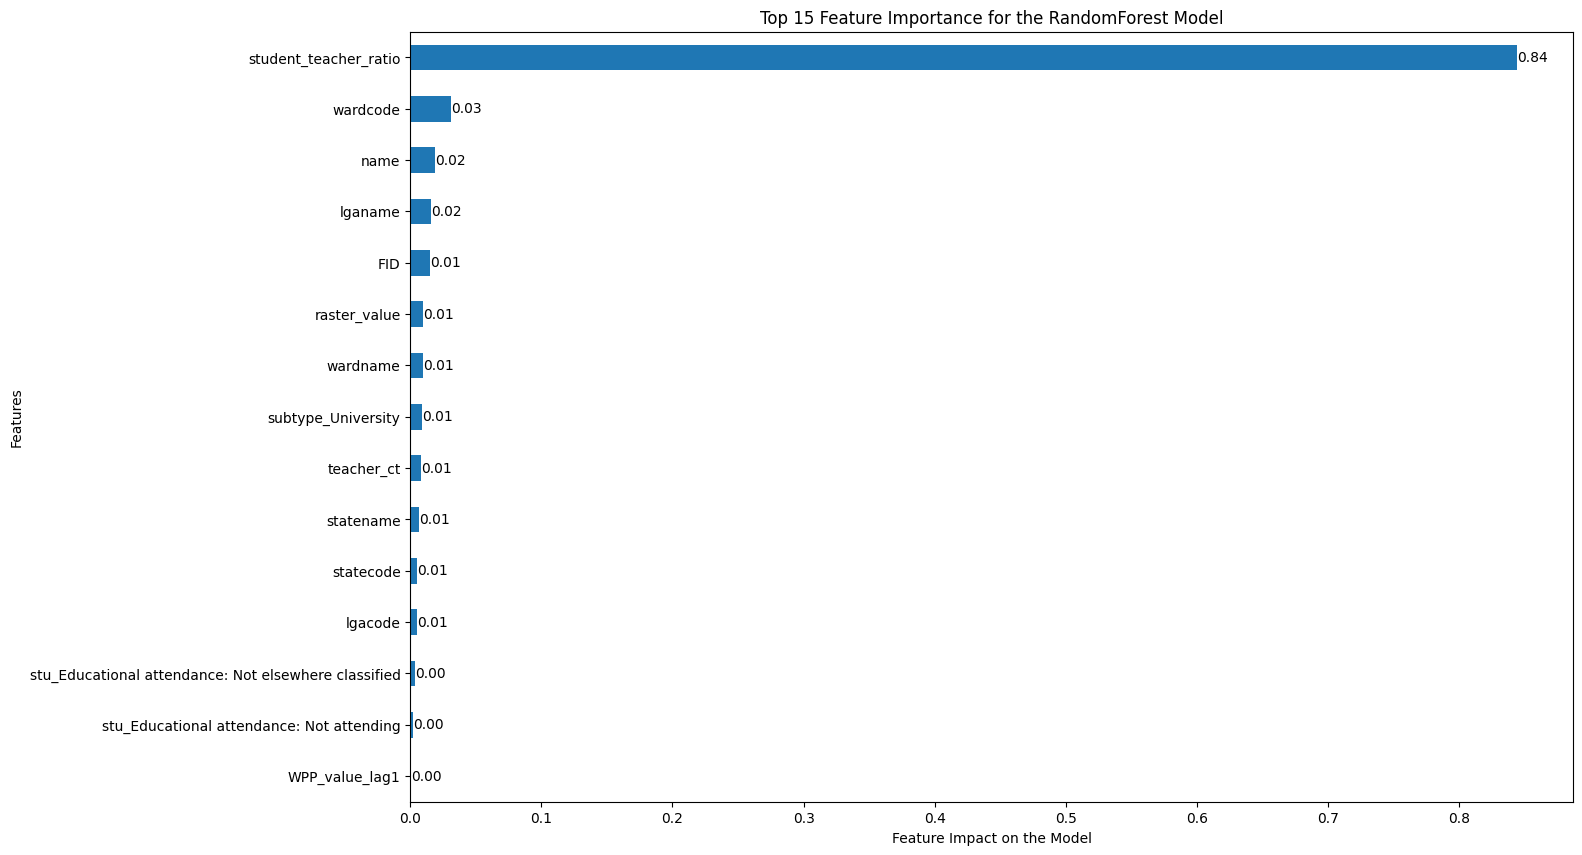

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = rf_feature_importance[:15].sort_values(ascending=True).plot(kind="barh", figsize=(15, 10))
plt.bar_label(container=ax.containers[0], fmt="%.2f")
plt.xlabel("Feature Impact on the Model")
plt.ylabel("Features")
plt.title("Top 15 Feature Importance for the RandomForest Model")
plt.show()

In [ ]:
final_df.head()

,statename,statecode,lganame,lgacode,wardname,wardcode,AdminUnit,Unnamed: 0,FID,globalid,...,category_Tertiary,student_teacher_ratio,attendance_prop_attending,attendance_prop_not_attending,WPP_value_lag1,student_ct_lag1,WPP_value_lag2,student_ct_lag2,WPP_value_lag3,student_ct_lag3
0,Adamawa,AD,Yola South,2021,Yolde Kohi,ADSYLA11,Nigeria,0,1,4621765a-c0db-4120-818c-94ce02e797cf,...,0,3.387175,0.227005,0.331363,NaN,NaN,NaN,NaN,NaN,NaN
1,Adamawa,AD,Yola South,2021,Yolde Kohi,ADSYLA11,Nigeria,1,1,4621765a-c0db-4120-818c-94ce02e797cf,...,0,3.387175,0.227005,0.331363,2.115527,-0.022154,NaN,NaN,NaN,NaN
2,Adamawa,AD,Yola South,2021,Yolde Kohi,ADSYLA11,Nigeria,2,1,4621765a-c0db-4120-818c-94ce02e797cf,...,0,3.387175,0.227005,0.331363,1.609973,-0.022154,2.115527,-0.022154,NaN,NaN
3,Adamawa,AD,Yola South,2021,Yolde Kohi,ADSYLA11,Nigeria,3,1,4621765a-c0db-4120-818c-94ce02e797cf,...,0,3.387175,0.227005,0.331363,1.179944,-0.022154,1.609973,-0.022154,2.115527,-0.022154
4,Adamawa,AD,Yola South,2021,Yolde Kohi,ADSYLA11,Nigeria,4,1,4621765a-c0db-4120-818c-94ce02e797cf,...,0,3.387175,0.227005,0.331363,0.821026,-0.022154,1.179944,-0.022154,1.609973,-0.022154


In [27]:
final_df.to_csv("final_dataset_forecasting.csv")

NameError: name 'final_df' is not defined

# FORECASTING STUDENT_CT with AgeGroup & Year

In [ ]:
# Full CNN-LSTM forecasting pipeline using the specified selected_features
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# -----------------------------
# User settings (tune these)
# -----------------------------
SAMPLE_FRAC = 0.01       # fraction of final_df to sample for development (reduce if memory issues)
SEQ_LEN = 3              # number of past timesteps to use (3 = use t-2,t-1,t to predict t+1)
RANDOM_STATE = 42
EPOCHS = 50
BATCH_SIZE = 128
LEARNING_RATE = 5e-4

# -----------------------------
# Selected features (from you)
# -----------------------------
selected_features = [
    'statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source',
    'raster_value', 'education_Integrated', 'management_Private', 'management_Public',
    'management_State Government', 'management_Unknown', 'subtype_Aggregate',
    'subtype_Junior', 'subtype_Nursery', 'subtype_Standard', 'subtype_Tertiary',
    'category_Tertiary', 'student_teacher_ratio', 'student_ct_lag1', 'AgeGroup', 'Year'
]
target_col = 'student_ct'  # target must exist in final_df

# -----------------------------
# 1) Load & sample dataframe
# -----------------------------
print("Preparing dataframe and sampling...")
df = final_df.copy()  # assumes final_df in env
if SAMPLE_FRAC < 1.0:
    df = df.sample(frac=SAMPLE_FRAC, random_state=RANDOM_STATE).reset_index(drop=True)

# remove duplicated/unnamed columns if any
df.columns = df.columns.str.replace(r'\.\d+', '', regex=True)
df = df.loc[:, ~df.columns.duplicated()]

# keep only available selected features and target
available_features = [c for c in selected_features if c in df.columns]
missing = set(selected_features) - set(available_features)
if missing:
    print("Warning: some selected_features not in dataframe and will be skipped:", missing)
use_cols = available_features + [target_col]
df = df.loc[:, [c for c in use_cols if c in df.columns]]

# basic cleaning: drop rows missing Year or target
df = df.dropna(subset=['Year', target_col])

# -----------------------------
# 2) Encode categorical columns
# -----------------------------
# We'll label-encode all object/category dtype columns among features
encoders = {}
cat_cols = [c for c in available_features if df[c].dtype == 'object' or str(df[c].dtype).startswith('category')]
for c in cat_cols:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c].astype(str))
    encoders[c] = le
print("Encoded categorical columns:", cat_cols)

# -----------------------------
# 3) Sort & group for sequences
# -----------------------------
group_cols = ['statecode', 'lganame', 'wardcode', 'AgeGroup']
for g in group_cols:
    if g not in df.columns:
        raise ValueError(f"Grouping column '{g}' missing from dataframe. Please include it in your selected features.")

# convert Year to integer (if not)
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
df = df.dropna(subset=['Year'])
df = df.sort_values(group_cols + ['Year']).reset_index(drop=True)

# -----------------------------
# 4) Build rolling sequences (X) and next-year target (y)
# -----------------------------
feature_cols = [c for c in available_features if c != 'Year']  # keep Year out of features (we use ordering)
# Note: if you want Year as feature also, include it in feature_cols (use available_features as-is)
if 'Year' in available_features:
    # include Year as a numeric feature if you want it as input
    # uncomment the next line to keep Year inside feature vector instead of only ordering
    # feature_cols.append('Year')
    pass

X_list = []
y_list = []
meta_list = []  # to keep metadata for each sample (group + last_year)
groups = df.groupby(group_cols, sort=False)

for (group_key, group_df) in groups:
    group_df = group_df.sort_values('Year')
    # need at least SEQ_LEN + 1 rows to build a sample (seq -> next year)
    if len(group_df) < SEQ_LEN + 1:
        continue
    arr = group_df[feature_cols].values
    target_arr = group_df[target_col].values
    years = group_df['Year'].values
    # sliding window
    for i in range(len(arr) - SEQ_LEN):
        X_seq = arr[i:i+SEQ_LEN]                 # shape (SEQ_LEN, n_features)
        y_target = target_arr[i+SEQ_LEN]         # next year target
        last_year = years[i+SEQ_LEN-1]           # last year included in X_seq
        X_list.append(X_seq)
        y_list.append(y_target)
        meta_list.append((*group_key, last_year))  # (statecode,lganame,wardcode,AgeGroup,last_year)

if len(X_list) == 0:
    raise ValueError("No sequences were created. Reduce SEQ_LEN or ensure groups have enough years.")

X = np.array(X_list)  # shape (n_samples, SEQ_LEN, n_features)
y = np.array(y_list)  # shape (n_samples,)
meta = np.array(meta_list)  # metadata

print(f"Built sequences: X.shape={X.shape}, y.shape={y.shape}")

# -----------------------------
# 5) Train-test split (shuffle samples)
# -----------------------------
X_train, X_test, y_train, y_test, meta_train, meta_test = train_test_split(
    X, y, meta, test_size=0.2, random_state=RANDOM_STATE, shuffle=True
)

# -----------------------------
# 6) Scale features and target (fit on train only)
# -----------------------------
n_timesteps, n_features = X_train.shape[1], X_train.shape[2]
# Flatten over time to fit scaler
X_train_flat = X_train.reshape(-1, n_features)
X_test_flat = X_test.reshape(-1, n_features)

x_scaler = StandardScaler()
X_train_flat_scaled = x_scaler.fit_transform(X_train_flat)
X_test_flat_scaled = x_scaler.transform(X_test_flat)

# reshape back
X_train_scaled = X_train_flat_scaled.reshape(-1, n_timesteps, n_features)
X_test_scaled = X_test_flat_scaled.reshape(-1, n_timesteps, n_features)

y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_scaled = y_scaler.transform(y_test.reshape(-1,1)).ravel()

print("Scaling complete. Shapes:", X_train_scaled.shape, X_test_scaled.shape)

# -----------------------------
# 7) Build the CNN-LSTM model
# -----------------------------
tf.keras.backend.clear_session()
model = Sequential([
    Conv1D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(n_timesteps, n_features)),
    Conv1D(filters=32, kernel_size=2, padding='same', activation='relu'),
    MaxPooling1D(pool_size=1),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)   # regression output (scaled)
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE), loss='mse', metrics=['mae'])
model.summary()

# -----------------------------
# 8) Train the model
# -----------------------------
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.2,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stop],
    verbose=1
)

# -----------------------------
# 9) Evaluate on test set (safe)
# -----------------------------
y_pred_scaled = model.predict(X_test_scaled).ravel()
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

print("Checking for NaNs before evaluation...")
print("NaNs in y_test:", np.isnan(y_test).sum())
print("NaNs in y_pred:", np.isnan(y_pred).sum())

mask = ~np.isnan(y_test) & ~np.isnan(y_pred)
if mask.sum() == 0:
    raise ValueError("All predictions or targets are NaN — check preprocessing.")
y_test = y_test[mask]
y_pred = y_pred[mask]

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nTest results (after filtering NaNs):")
print(f"MSE: {mse:.6f}, MAE: {mae:.6f}, RMSE: {rmse:.6f}, R2: {r2:.4f}")


# -----------------------------
# 10) Forecasting helper: forecast_horizon()
# -----------------------------
# This function takes the most recent SEQ_LEN timesteps for a given group (statecode,lganame,wardcode,AgeGroup)
# and recursively predicts `horizon` future years. It assumes only student_ct_lag1 is dynamic and will be updated with predictions.
# If you have other dynamic features (WPP, teacher_ct changes), you must supply projected values for those features.

feature_names = feature_cols  # name order used in X arrays

# find index of student_ct_lag1 in feature vector (if present)
if 'student_ct_lag1' in feature_names:
    idx_student_lag = feature_names.index('student_ct_lag1')
else:
    idx_student_lag = None

def get_latest_sequence_for_group(statecode, lganame, wardcode, agegroup):
    """Return latest sequence (SEQ_LEN x n_features) for the specified group from the original df."""
    cond = (
        (df['statecode'] == statecode) &
        (df['lganame']  == lganame) &
        (df['wardcode'] == wardcode) &
        (df['AgeGroup'] == agegroup)
    )
    grp = df.loc[cond].sort_values('Year')
    if len(grp) < SEQ_LEN:
        raise ValueError("Not enough history for this group.")
    arr = grp[feature_cols].values
    return arr[-SEQ_LEN:]  # last SEQ_LEN rows

def forecast_horizon(model, x_last_seq, horizon=1):
    """
    x_last_seq: numpy array shape (SEQ_LEN, n_features) with raw (unscaled) values in same order as feature_cols
    returns: list of predicted student_ct values (raw scale), length=horizon
    """
    preds = []
    seq = x_last_seq.copy()  # will mutate
    for h in range(horizon):
        # scale sequence using x_scaler (remember scaler expects flattened features)
        seq_flat = seq.reshape(-1, n_features)
        seq_flat_scaled = x_scaler.transform(seq_flat).reshape(1, SEQ_LEN, n_features)
        # predict (scaled)
        yhat_scaled = model.predict(seq_flat_scaled).ravel()[0]
        yhat = y_scaler.inverse_transform([[yhat_scaled]])[0,0]
        preds.append(yhat)

        # prepare next seq: shift left and append new timestep
        # We'll take last row features as template and update student_ct_lag1 with the predicted value (if available)
        next_row = seq[-1].copy()
        if idx_student_lag is not None:
            next_row[idx_student_lag] = yhat  # update lag value with predicted student_ct
        # optionally, if Year is included in feature vector, increment it by 1
        if 'Year' in feature_cols:
            yi = feature_cols.index('Year')
            next_row[yi] = next_row[yi] + 1
        # shift
        seq = np.vstack([seq[1:], next_row])
    return preds

# Example usage of forecast_horizon for a single group
# replace these with an actual group present in your sample
example_group = None
for (s,l,w,a), group_df in df.groupby(['statecode','lganame','wardcode','AgeGroup']):
    example_group = (s,l,w,a)
    break

if example_group is not None:
    s,l,w,a = example_group
    try:
        last_seq_raw = get_latest_sequence_for_group(s,l,w,a)
        preds_3yrs = forecast_horizon(model, last_seq_raw, horizon=3)
        print(f"\nExample forecasts for group {example_group} for next 3 years: {preds_3yrs}")
    except Exception as ex:
        print("Could not forecast example group:", ex)

# -----------------------------
# 11) Persist encoders & scalers (optional)
# -----------------------------
# encoders: dict of LabelEncoder for categorical columns (cat_cols)
# x_scaler, y_scaler: StandardScaler objects
# model: trained keras model
#
# You can save them using joblib / pickle / model.save() as needed.

print("\nPipeline complete. You can now use 'forecast_horizon' with the latest SEQ_LEN rows per group to generate year-by-year forecasts.")


Preparing dataframe and sampling...
Encoded categorical columns: ['statecode', 'lganame', 'wardcode', 'source']
Built sequences: X.shape=(5322, 3, 21), y.shape=(5322,)
Scaling complete. Shapes: (4257, 3, 21) (1065, 3, 21)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 3, 64)          │         2,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3, 32)          │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,937 (140.38 KB)

 Trainable params: 35,937 (140.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: nan -

ValueError: All predictions or targets are NaN — check preprocessing.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# ==============================================================
# 1️⃣ Load and Sample Data
# ==============================================================
print("📂 Preparing dataset...")

data = final_df.copy()
data = data.sample(frac=0.01, random_state=42).reset_index(drop=True)

# --- Clean duplicate column names ---
data.columns = data.columns.str.replace(r'\.\d+', '', regex=True)
data = data.loc[:, ~data.columns.duplicated()]

# ==============================================================
# 2️⃣ Select Features + Target
# ==============================================================
selected_features = [
    'statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source', 
    'raster_value', 'education_Integrated', 'management_Private', 
    'management_Public', 'management_State Government', 'management_Unknown', 
    'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery', 
    'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary', 
    'student_teacher_ratio', 'student_ct_lag1', 'AgeGroup', 'Year'
]
target_col = 'student_ct'

# Keep only features that exist in dataset
available_features = [col for col in selected_features if col in data.columns]
data = data[available_features + [target_col]]

print(f"✅ Features used: {available_features}")
print(f"✅ Total features: {len(available_features)}")

# ==============================================================
# 3️⃣ Encode Categorical Columns
# ==============================================================
categorical_cols = [
    'statecode', 'lganame', 'wardcode', 'source', 'AgeGroup'
]
for col in categorical_cols:
    if col in data.columns:
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col].astype(str))

# ==============================================================
# 4️⃣ Data Cleaning & Validation
# ==============================================================
# Replace inf / -inf with NaN
data = data.replace([np.inf, -np.inf], np.nan)

# Drop rows where target is missing
data = data.dropna(subset=[target_col])

# Fill remaining NaNs in predictors with median
for col in data.columns:
    if data[col].isna().sum() > 0:
        if data[col].dtype in [np.float64, np.int64]:
            data[col] = data[col].fillna(data[col].median())
        else:
            data[col] = data[col].fillna(data[col].mode()[0])

# Ensure target numeric
data[target_col] = pd.to_numeric(data[target_col], errors='coerce')
data = data.dropna(subset=[target_col])

# Cap outliers
num_cols = data.select_dtypes(include=[np.number]).columns
data[num_cols] = data[num_cols].clip(
    lower=data[num_cols].quantile(0.01),
    upper=data[num_cols].quantile(0.99),
    axis=1
)

print(f"✅ Clean data shape: {data.shape}")
print(f"✅ Target range: {data[target_col].min():.2f} → {data[target_col].max():.2f}")

# ==============================================================
# 5️⃣ Split & Scale
# ==============================================================
X = data.drop(columns=[target_col])
y = data[target_col].values.reshape(-1, 1)

# Scale
X_scaler = StandardScaler()
y_scaler = StandardScaler()

X_scaled = X_scaler.fit_transform(X)
y_scaled = y_scaler.fit_transform(y)

# Reshape for CNN-LSTM
X_scaled = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42
)

print(f"✅ Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# ==============================================================
# 6️⃣ Build CNN–LSTM Model
# ==============================================================
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    LSTM(64, return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

optimizer = Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.summary()

# ==============================================================
# 7️⃣ Train Model
# ==============================================================
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

# ==============================================================
# 8️⃣ Evaluate Model
# ==============================================================
# Predict
y_pred_scaled = model.predict(X_test).ravel()

# Inverse transform to original scale
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_orig = y_scaler.inverse_transform(y_test.reshape(-1, 1)).ravel()

# Remove NaNs if any
mask = ~np.isnan(y_test_orig) & ~np.isnan(y_pred)
y_test_orig = y_test_orig[mask]
y_pred = y_pred[mask]

# Evaluation Metrics
mse = mean_squared_error(y_test_orig, y_pred)
mae = mean_absolute_error(y_test_orig, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_orig, y_pred)

print("\n--- 📊 CNN–LSTM Evaluation ---")
print(f"✅ MAE:  {mae:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R²:   {r2:.4f}")

# ==============================================================
# 9️⃣ Forecast Example
# ==============================================================
# Example forecast for future year (e.g. 2026)
future_input = X.iloc[[0]].copy()
future_input['Year'] = 2026
future_scaled = X_scaler.transform(future_input)
future_scaled = future_scaled.reshape(future_scaled.shape[0], future_scaled.shape[1], 1)

forecast_scaled = model.predict(future_scaled)
forecast = y_scaler.inverse_transform(forecast_scaled).ravel()[0]

print(f"\n📈 Forecasted student count for 2026 (sample LGA/Ward): {forecast:.2f}")


📂 Preparing dataset...
✅ Features used: ['statecode', 'lganame', 'wardcode', 'FID', 'teacher_ct', 'source', 'raster_value', 'education_Integrated', 'management_Private', 'management_Public', 'management_State Government', 'management_Unknown', 'subtype_Aggregate', 'subtype_Junior', 'subtype_Nursery', 'subtype_Standard', 'subtype_Tertiary', 'category_Tertiary', 'student_teacher_ratio', 'student_ct_lag1', 'AgeGroup', 'Year']
✅ Total features: 22
✅ Clean data shape: (113054, 23)
✅ Target range: -0.24 → 0.63
✅ Train shape: (90443, 22, 1), Test shape: (22611, 22, 1)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 20, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,393 (138.25 KB)

 Trainable params: 35,393 (138.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.1791 - mae: 0.1543 - val_loss: 0.0112 - val_mae: 0.0442
Epoch 2/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0227 - mae: 0.0677 - val_loss: 0.0053 - val_mae: 0.0296
Epoch 3/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0165 - mae: 0.0555 - val_loss: 0.0047 - val_mae: 0.0313
Epoch 4/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0140 - mae: 0.0489 - val_loss: 0.0033 - val_mae: 0.0309
Epoch 5/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0119 - mae: 0.0422 - val_loss: 0.0020 - val_mae: 0.0275
Epoch 6/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0112 - mae: 0.0398 - val_loss: 0.0024 - val_mae: 0.0150
Epoch 7/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0107 - mae: 0.0366 - val_loss: 0.0023 - val_mae: 0.0231
Epoch 8/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0102 - mae: 0.0348 - val_loss: 0.0013 - val_mae: 0.0169
Epoch 9/25
566/566 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - lo

In [ ]:
# Convert back to original units:
forecast_original = y_scaler.inverse_transform(forecast_scaled.reshape(-1, 1)).ravel()[0]

print(f"📈 Forecasted student count for 2026: {forecast_original:.2f}")

📈 Forecasted student count for 2026: 0.10


In [ ]:
# Assuming scaler is the StandardScaler() used in load_and_clean_dataset()
student_ct_index = numeric_features.index("student_ct")

mean_student_ct = scaler.mean_[student_ct_index]
std_student_ct = np.sqrt(scaler.var_[student_ct_index])

forecast_original = (forecast_scaled * std_student_ct) + mean_student_ct

print(f"📈 True forecasted student count for 2026: {forecast_original:.0f}")


### Emmax's Work

In [1]:
import pandas as pd

In [2]:
filepath = r'/Users/user/Downloads/2025-10-03_-_Worker_and_Temporary_Worker.csv'

In [3]:
emmax_df = pd.read_csv(filepath)

In [4]:
emmax_df.head()

,Organisation Name,Town/City,County,Type & Rating,Route
0,McMullan Shellfish,Ballymena,Co Antrim,Worker (A rating),Skilled Worker
1,"""K"" Line Energy Shipping (UK) Limited",LONDON,NaN,Worker (A rating),Skilled Worker
2,"""K"" Line Energy Shipping (UK) Limited",LONDON,NaN,Worker (A rating),Global Business Mobility: Senior or Specialist...
3,(A1F1 Limited T/A ) Ultrasound Direct London,Croydon,London,Worker (A rating),Skilled Worker
4,(IECC Care) Independent Excel Care Consortium ...,Colchester,NaN,Worker (A rating),Skilled Worker


In [5]:
emmax_df["Type & Rating"].unique()

array(['Worker (A rating)', 'Temporary Worker (A rating)',
       'Worker (UK Expansion Worker: Provisional)', 'Worker (B rating)',
       'Worker (A (SME+))', 'Temporary Worker (A (SME+))',
       'Temporary Worker (B rating)', 'Worker (A (Premium))',
       'Temporary Worker (A (Premium))'], dtype=object)

In [6]:
emmax_df["Route"].unique()

array(['Skilled Worker',
       'Global Business Mobility: Senior or Specialist Worker',
       'Creative Worker', 'Scale-up', 'Tier 2 Ministers of Religion',
       'Global Business Mobility: UK Expansion Worker',
       'Global Business Mobility: Graduate Trainee',
       'International Sportsperson', 'Charity Worker', 'Religious Worker',
       'Government Authorised Exchange', 'Seasonal Worker',
       'Global Business Mobility: Service Supplier',
       'International Agreement',
       'Global Business Mobility: Secondment Worker',
       'Intra Company Transfers (ICT)', 'Intra-company Routes'],
      dtype=object)

In [7]:
emmax_df["Organisation Name"].unique()

array([' McMullan Shellfish', '"K" Line Energy Shipping (UK) Limited',
       '(A1F1 Limited T/A ) Ultrasound Direct London', ...,
       'ZZN STUDIO LTD', 'Zzoomm Plc', 'ZZZ Limited'], dtype=object)

In [8]:
emmax_df[emmax_df["Route"] == 'Skilled Worker']

,Organisation Name,Town/City,County,Type & Rating,Route
0,McMullan Shellfish,Ballymena,Co Antrim,Worker (A rating),Skilled Worker
1,"""K"" Line Energy Shipping (UK) Limited",LONDON,NaN,Worker (A rating),Skilled Worker
3,(A1F1 Limited T/A ) Ultrasound Direct London,Croydon,London,Worker (A rating),Skilled Worker
4,(IECC Care) Independent Excel Care Consortium ...,Colchester,NaN,Worker (A rating),Skilled Worker
5,*ABOUTCARE HASTINGS LTD,East Sussex,NaN,Worker (A rating),Skilled Worker
...,...,...,...,...,...
137805,ZZA CONSULTING LIMITED,LONDON,NaN,Worker (A rating),Skilled Worker
137806,ZZIY Ltd,High Wycombe,NaN,Worker (A rating),Skilled Worker
137807,ZZN STUDIO LTD,HAMPTON,NaN,Worker (A rating),Skilled Worker
137808,Zzoomm Plc,Oxford,NaN,Worker (A rating),Skilled Worker


In [12]:
"engineering" in emmax_df["Organisation Name"]

False

In [15]:
xx = []
for i in emmax_df["Organisation Name"]:
    if "construction" in i:
        print("True")
        xx.append("True")
    else:
        print("False")

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [16]:
xx

['True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True',
 'True']

In [19]:
first_df = emmax_df[emmax_df["Organisation Name"].str.contains("construction", case=False, na=False)]

In [21]:
second_df = emmax_df[emmax_df["Organisation Name"].str.contains("engineering")]

In [25]:
emmax_df_1 = pd.concat([first_df, second_df], axis=0)

In [26]:
emmax_df_1.to_csv("Emmax.csv")